# Construction d'un neurone

On commence par construire un neurone simple, qu'on va ensuite tester. Je m'inspire beaucoup de l'exemple donné par [Miximum](https://www.miximum.fr/blog/introduction-au-deep-learning-1/).

J'utilise une classe définissant un objet neurone, qui aura:
- un constructeur (nommé classiquement `__init__`), 
- une méthode d'activation 
- une méthode de mise à jour les poids des neurones qui lui sont connectés en amont. 

Pour s'intégrer plus tard dans un réseau, le neurone doit renvoyer un résultat de même nature que son entrée. Dans cette première version, les entrées seront entre 0 et 1 et la sortie devra donc être aussi entre 0 et 1. Ici, la sortie sera la moyenne pondérée des signaux qui lui arrivent.

In [3]:
import numpy as np

class Neuron:
    def __init__(self, input_weights):
        """Initialisation des poids."""
        self.weights = input_weights
        
    def activation(self, X):
        """X est le vecteur d'entrée du neurone."""
        return np.average(X, weights= self.weights)
    
    def update_weights(self, input_weights):
        """ mise à jour des poids """
        self.weights = input_weights

Le neurone sera testé en lui demandant de distinguer deux entrées qui sont radicalement différentes : `Vec1` et `Vec2`.

In [4]:
n = 10
nb_zeros = 5
Uns = np.ones(nb_zeros)
Zeros = np.zeros(n - nb_zeros)
Vec1 =  np.concatenate((Zeros, Uns))
Vec1

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [5]:
Vec2 = np.concatenate((Uns, Zeros))
Vec2

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

Je veux distinguer `Vec1` de `Vec2`. L'objectif est de trouver les poids pour que la sortie du neurone soit 0 quand l'entrée est `Vec1` et 1 pour `Vec2`.

In [6]:
VecWght = Vec1
VecWght

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

Je construis maintenant mon neurone avec la classe définit précédement. Je me souviens que pour cela, le constructeur `__init__` demande de donner le nombre de neurones connectés en amont, donc ici mes `n` entrées.

Je présente ici (comme plus tard) le résultat qui est entre 0 et 255 comme un pourcentage.

In [7]:
mon_neurone = Neuron(VecWght)
res = mon_neurone.activation(Vec1)
print(f'{res*100:.2f}%')

100.00%


In [8]:
res = mon_neurone.activation(Vec2)
print(f'{res*100:.2f}%')

0.00%


La reconnaissance est parfaite, mais ce cas est trivial.

# Rendre l'entrée plus visuelle

Ici je rend l'entrée plus visuelle en affichant une matrice de point comme un image. Pour garder une reconnaissance simple, je choisis  deux images radicalement différentes, la première aura sa moitié inférieure blanche et la moitié supérieure noire. Pour la deuxième, ce sera la contraire. 

Je garde une image petit constituée d'une matrice 12x12 qui contient donc 144 points. L'extension [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) propose la commande [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) pour afficher des matrices de points.

Le neurone voit chaque pixel de l'image d'entrée qui donne son intensité, ici choisit entre 0 et 255. Je reste avec une image en noir et blanc (en valeurs de gris plus précisément). Une image en couleur demanderait de refaire la reconnaissance sur les trois couche *Red Green Blue*.

Pour construire mon image, j'utilise les techniques de remplissage rapide sur les vecteurs Numpy données dans le fichier [01_numpy.ipynb](../02_std_ext/01_numpy.ipynb). Je fais aussi un prétraitement qui consiste à convertir la matrice de point 12x12 en un vecteur de 144 points avec la commande [numpy.reshape](https://www.w3schools.com/python/numpy/numpy_array_reshape.asp), ce qui permet de n'avoir qu'une boucle sur tous les pixels au lieu de deux.

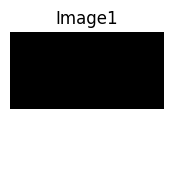

In [9]:
nb_points = 144
points_noirs = np.zeros(nb_points//2)   # attention, bien utiliser la division d'entiers
points_blancs = np.ones(nb_points - nb_points // 2)  # on pourrait faire plus simple
points_blancs = points_blancs * 255     # on veut une échelle de 1 à 255 pour les nuances de gris ensuite

Input1 = np.concatenate((points_noirs, points_blancs))
Matrice1 = np.reshape(Input1, (12, 12))

import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(Matrice1, cmap="gray")
plt.title('Image1')
plt.axis("off")
plt.show()

Pour la deuxième image à distinguer, qui sera donc `Input2`, je choisis de mettre en blanc la partie supérieure de l'image.

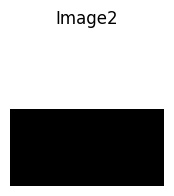

In [10]:
Input2 = np.concatenate((points_blancs, points_noirs))
Matrice2 = np.reshape(Input2, (12, 12))

import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(Matrice2, cmap="gray")
plt.title('Image2')
plt.axis("off")
plt.show()

Pour distinguer `Image1` d'`Image2`, je peux facilement deviner les poids qu'il faut utiliser.

In [11]:
Weight = np.concatenate((np.ones(nb_points//2), np.zeros(nb_points//2)))

Avec ces poids, on est sûr de pouvoir reconnaitre l'`Image2`. L'activation du neurone sur l'`Image2` avec ce filtre donnera une valeur de 255 et de 0 sur l'`Image1`. Je convertis ici en pourcentage.

In [12]:
# on aplatit la matrice de poids
mon_neurone = Neuron(Weight)
res = mon_neurone.activation(Input1)
print(f'{res *100 / 255:.0f}%')

0%


In [13]:
res = mon_neurone.activation(Input2)
print(f'{res * 100 / 255:.0f}%')

100%


Sur ce cas trivial, j'obtient un résultat simple et clair.

# Rendre l'entrée moins simple

Le cas précédant était trop simple pour montrer l'intérêt du neurone. J'introduis maintenant du bruit pour rendre la distinction moins triviale. J'utilise les fonctions randoms présentées dans le fichier [02_random](../02_std_ext/02_random.ipynb) pour générer des séries de nombres entre 0 et 255 qui donnent une échelle de gris. Par contre, les entrées `Input3` et `Input4` sont consituées de valeurs normalisées entre 0 et 1. Enfin j'affiche les images côte à côte avec le commande [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html).

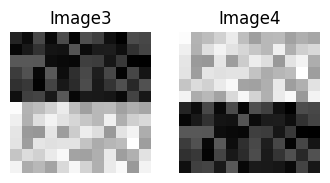

In [14]:
rng = np.random.RandomState(seed=1)
Sombres = rng.randint(0, 90, size= nb_points // 2)
Clairs = rng.randint(150, 255, size= nb_points // 2)

Input3 = np.concatenate((Sombres, Clairs))
Input4 = np.concatenate((Clairs, Sombres))

plt.figure(figsize=(4,8))
plt.subplot(1,2, 1)
plt.imshow(np.reshape(Input3,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Image3")

plt.subplot(1,2, 2)
plt.imshow(np.reshape(Input4,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Image4")

plt.show()


J'essaye toujours d'appliquer la distinction faite par le neurone pour ces deux images différentes.

In [15]:
Weight = np.concatenate((np.ones(nb_points//2), np.zeros(nb_points//2)))

In [16]:
mon_neurone = Neuron(Weight)
res = mon_neurone.activation(Input3)
print(f'{res * 100 /255:.0f}%')

16%


In [17]:
res = mon_neurone.activation(Input4)
print(f'{res * 100 / 255:.0f}%')

79%


Sans trop de surprise la reconnaissance, la reconnaissance est moins claire. 

Pour améliorer la reconnaissance, j'applique un filtre qui a pour fonction d'écarter les extrèmes. Les points ont une valeur entre 0 (le noir) et 255 (le blanc). Le filtre pousse les valeurs gris claires vers le blanc (255) et les valeurs gris sombres vers le noir (0).

In [18]:
spc = 40
val_min = 0  # pour mémoire
val_max = 255
hlim = 256 // 2 + spc // 2 
llim = hlim - spc

def filtre(x):
    if x <= llim:
        return 0
    elif x < hlim:
        return val_max * (x - llim) / (hlim - llim)
    else:
        return val_max

X_val = list(range(val_max))
Y_val = [filtre(x) for x in X_val]

import plotly.graph_objects as go
# mon style personnalisé pour les graphiques
fond_gris = {
  'layout': go.Layout(
            title={'font_size':24, 'font_color':'black'},
            margin={'t': 60, 'b': 10, 'l': 20, 'r': 20},
            paper_bgcolor='gray',
            plot_bgcolor='lightgray'
  )
}
# plus d'info sur les personnalisations graphiques sur :
# https://plotly.com/python/templates/

fig = go.Figure(data=go.Scatter(x=X_val, y=Y_val))
fig.update_layout(title='filtre', template=fond_gris, width = 400, height = 200)
fig.show()

Voici la deuxième version du neurone qui applique ce filtre à la somme des entrées pondérées (cette somme pondérée donnant un signal est ici nommé `aggregation`).

In [19]:
class Neuron2:
    spc = 40
    val_min = 0
    val_max = 255
    hlim = 256 // 2 + spc // 2
    llim = hlim - spc

    def __init__(self, input_weights):
        """Initialisation des poids."""
        self.weights = input_weights
    
    def _filter_(self, val):
        """définition de la fonction de filtre"""        
        if val <= llim:
            return 0
        elif val < hlim:
            return val_max * (val - llim) / (hlim - llim)
        else:
            return val_max

    def _filter_prime_(self, val):
        """dérivée de la fonction de filtre"""
        if val <= llim:
            return 0
        elif val < hlim:
            return val_max / (hlim - llim)
        else:
            return 0
        
    def activation(self, X):
        """X est le vecteur d'entrée du neurone."""
        # aggregation = np.dot(self.weights, X)  # produit scalaire
        aggregation = np.average(X, weights= self.weights)
        return self._filter_(aggregation)
    
    def update_weights(self, input_weights):
        """ mise à jour des poids """
        self.weights = input_weights

En appliquant ce nouveau neurone à la distinction des images.

In [20]:
Weight = np.concatenate((np.ones(nb_points//2), np.zeros(nb_points//2)))

In [21]:
mon_neurone2 = Neuron2(Weight)
res = mon_neurone2.activation(Input3)
print(f'{res*100/255:.0f}%')

0%


In [22]:
res = mon_neurone2.activation(Input4)
print(f'{res*100/255:.0f}%')

100%


Comme attendu, le filtre améliore radicalement la clareté de la reconnaissance.

# Vers un apprentissage supervisé automatique (pas fini !)

L'objectif d'un apprentissage automatique supervisé est de construire un algorithme permettant de trouver automatiquement les poids à utiliser en fonction des images qui lui sont soumises et du résultat qu'on veut en obtenir.

Ici nous avons quatres images et je veux classer ainsi :
- Image1, Image2 : le résultat doit être 0
- Image2, Image4 : le résultat doit être à 255 (qu'on peut traduire en 100% en post traitement)

In [45]:
Inputs = [Input1, Input2, Input3, Input4]
Expected = [0, 255, 0, 255]

Dans cet exemple simplifié, je vais paramétrer le nombre de lectures pour "apprendre". Un algorithme final chercherait à minimiser une erreur.

L'algorithme va définir une fonction calculant une erreur qui exprime la distance entre le résultat obtenu par le neurone et le résultat attendu. L'objectif sera de réduire cette distance au minimum en modifiant les poids en consuisant mes pas *dans la bonne direction* grâce à la méthode de descente du gradient.

La définition du neurone doit aussi être revue pour inclure cette mise à jour des poids.

Si je note $(w_i)_i$ les points des entrées $(a_i)_i$ et $f$ la fonction de filtrage, le calcul effectué par le neurone correspond à l'équation suivante.

$$ y = f\big(\sum_{i=1}^n w_i \cdot a_i \big) = f(A) \quad \text{avec} \quad A = \sum_{i=1}^n w_i \cdot a_i $$

Je fais varier ces poids $(w_i)_i$ et je cherche à minimiser cette erreur. Le gradient en fonction des $(w_i)_i$ se calcule de la manière suivante.

$$\overrightarrow{\nabla y} = \sum_{i=1}^n \frac{\partial y}{\partial w_i} \overrightarrow{e_i}$$

Chacune de dérivée partielle se calcule ainsi.

$$\frac{\partial y}{\partial w_i} = \frac{\partial{f(A)}}{\partial w_i} = a_i \cdot f'(A)$$

Le principe de la descente du gradient donc de réduire le vecteur des poids en utilisant ce gradient, éventuellement avec une vitesse de descente $\alpha$.

$$w_i \longrightarrow w_i - \alpha \cdot a_i \cdot f'(A)$$

Voici la version 3 du neurone.

In [207]:
class Neuron3:
    """
    Troisième version du neurone permettant l'apprentissage automatique
    """
    spc = 40
    val_min = 0
    val_max = 255
    hlim = 256 // 2 + spc // 2
    llim = hlim - spc
    # speed = 1
    
    def __init__(self, input_weights):
        """Initialisation des poids."""
        self.weights = input_weights
    
    def _filter_(self, val):
        """définition de la fonction de filtre"""        
        if val <= llim:
            return 0
        elif val < hlim:
            return val_max * (val - llim) / (hlim - llim)
        else:
            return val_max

    def _filter_prime_(self, val):
        """dérivée de la fonction de filtre en un point"""            
        if val <= llim:
            return 0
        elif val < hlim:
            return val_max / (hlim - llim)
        else:
            return 0
    
    # >>> revoir à partir d'ici
    def activation(self, X):
        """X est le vecteur d'entrée du neurone."""        
        sum_weights = sum(self.weights)
        if sum_weights == 0:
            return 0
        else:
            aggr = np.dot(self.weights, X) / sum_weights
            return self._filter_(aggr)
    
    def update_weights(self, X, speed = 0.01):        
        """mise à jour des poids, pour un vecteur d'entrée X et une vitesse choisie"""
        # self.weights -= speed * np.dot(self.weights, self._filter_grad_(self.weights))
        sum_weights = sum(self.weights)
        if sum_weights == 0:
            return
        else:
            aggr = np.dot(self.weights, X) / sum_weights

        # aggr = np.average(X, weights = self.weights)
        fpr = self._filter_prime_(aggr)
        if fpr == 0:
            return
        else:
            for id in range(len(self.weights)):
                if self.weights[id] <= 0.0 or self.weights[id] >= 1.0:
                    continue     # no more calculation on weight achieving 0 or 1
                else:
                    self.weights[id] -= speed * self.weights[id] * fpr
                    if self.weights[id] < 0:
                        self.weights[id] = 0   # weight cannot be below 0
                    elif self.weights[id] > 1:
                        self.weights[id] = 1   # weight cannot be above 1
            

L'initialisation sera fait avec des poids choisis au hazard entre 0 et 1.

In [208]:
rng = np.random.RandomState(seed=5)
Weight = rng.random_sample(144)
mon_neurone3 = Neuron3(Weight)

Voici ces poids présenté comme une image.

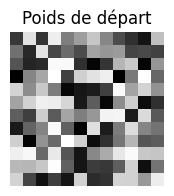

In [209]:
plt.figure(figsize=(2,2))
plt.imshow(np.reshape(mon_neurone3.weights,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Poids de départ")
plt.show()

Voici les résultats des reconnaissances avec ces poids aléatoires.

In [210]:
for X, num in zip(Inputs, (1, 2, 3, 4)):
    res = mon_neurone3.activation(X)
    print(f'Image{num}: {res*100/255:.2f}%')

Image1: 59.63%
Image2: 37.87%
Image3: 41.29%
Image4: 25.90%


Comme attendu, la reconnaissance faite avec ces poids aléatoires renvoie un joyeux bazare et ne permet pas de faire la distinction bien claire.

Je vais maintenant plusieurs expérimentations et à chacune d'entre elle, j'améliore le poids avec la méthode du gradient.

In [213]:
y = mon_neurone3.activation(Input2)
d = (255 - y) / 255.0
print(f'{d*100:.2f}%')

62.13%


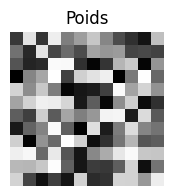

In [214]:
mon_neurone3.update_weights(X, 0.2*d)

plt.figure(figsize=(2,2))
plt.imshow(np.reshape(mon_neurone3.weights,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Poids")
plt.show()

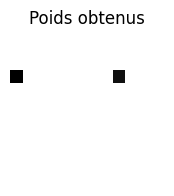

In [75]:
y = mon_neurone3.activation(Input2)

        
d = (255 - y) / 255.0
y = mon_neurone3.update_weights(X, d)


plt.figure(figsize=(2,2))
plt.imshow(np.reshape(mon_neurone3.weights,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Poids obtenus")
plt.show()

In [ ]:
for X, y0 in zip(Inputs[0:1], Expected[0:1]):
        y = mon_neurone3.activation(X)
        d = (y0 - y) / 255.0
        y = mon_neurone3.update_weights(X, d)

plt.figure(figsize=(2,2))
plt.imshow(np.reshape(mon_neurone3.weights,(12,12)), cmap="gray")
plt.axis("off")
plt.title("Poids obtenus")
plt.show()

Et donc avec ces nouveaux poids obtenus, on peut essayer une reconnaissance.

In [42]:
for X, num in zip(Inputs, (1, 2, 3, 4)):
    res = mon_neurone3.activation(X)
    print(f'Image{num}: {res*100/255:.2f}%')

Image1: 100.00%
Image2: 0.00%
Image3: 100.00%
Image4: 0.00%


voir cours MIT : https://www.youtube.com/watch?v=VrMHA3yX_QI